In [1]:
!pip install yfinance 
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


     |████████████████████████████████| 6.4 MB 7.1 MB/s 
     |████████████████████████████████| 63 kB 818 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
J=yf.Ticker('^GSPC')
sp=J.history(start='2019-01-01', end='2022-03-27')
sp.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,3733160000,0,0
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,3822860000,0,0
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,4213410000,0,0
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,4104710000,0,0
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,4083030000,0,0


In [3]:
SP=sp.drop(['Dividends','Stock Splits'],axis=1)

In [4]:
profit=SP['Close'].shift(-1)-SP['Close']
SP['Profit']=profit

In [ ]:
SP['Wealth']=SP['Profit'].cumsum()

In [ ]:
SP['Wealth'].tail(20)

Date
2022-02-28    1796.229736
2022-03-01    1876.510010
2022-03-02    1853.460205
2022-03-03    1818.840088
2022-03-04    1691.059814
2022-03-07    1660.670166
2022-03-08    1767.849854
2022-03-09    1749.489990
2022-03-10    1694.280029
2022-03-11    1663.079834
2022-03-14    1752.420166
2022-03-15    1847.829834
2022-03-16    1901.639893
2022-03-17    1953.090088
2022-03-18    1951.150146
2022-03-21    2001.579834
2022-03-22    1946.210205
2022-03-23    2010.130127
2022-03-24    2033.030029
2022-03-25            NaN
Name: Wealth, dtype: float64

***Simple Moving Average***


MA10>MA50= Buy signal

In [ ]:
SP['MA10']=SP['Close'].rolling(10).mean()
SP['MA50']=SP['Close'].rolling(50).mean()
SP['MA100']=SP['Close'].rolling(100).mean()

In [ ]:
SP['Close1']=SP['Close'].shift(-1)

In [ ]:
SP['Profit_SMA']=[SP.loc[ei,'Close1'] - SP.loc[ei,'Close'] if SP.loc[ei,'MA10'] > SP.loc[ei,'MA50'] else 0 for ei in SP.index]

***Moving Average Convergence Divergence MACD***

EMA12>EMA26=  Buy signal

In [ ]:
SP['EMA_12']=SP['Close'].ewm(com=12).mean()
SP['EMA_26']=SP['Close'].ewm(com=26).mean()


In [ ]:
SP['Profit_EMA']=[SP.loc[ei,'Close1'] - SP.loc[ei,'Close'] if SP.loc[ei,'EMA_12'] > SP.loc[ei,'EMA_26'] else 0 for ei in SP .index]

In [ ]:
SP['Wealth_EMA']=SP['Profit_EMA'].cumsum()

**On Balance Volume OBV**

OBV>OBV_EMA= Buy signal

In [ ]:
OBV=[]
OBV.append(0)
for i in range (1,len(SP.Close)):
    if SP.Close[i] > SP.Close[i-1]:
      OBV.append(OBV[-1] + SP.Volume[i])
    elif SP.Close[i] < SP.Close[i-1]:
      OBV.append(OBV[-1] - SP.Volume[i])
    else:
        OBV.append(OBV[-1])

In [ ]:
SP['OBV']=OBV

In [ ]:
SP['OBV_EMA']=SP['OBV'].ewm(com=20).mean()

In [ ]:
SP['Profit_OBV']=[SP.loc[ei,'Close1'] - SP.loc[ei,'Close'] if SP.loc[ei,'OBV'] > SP.loc[ei,'OBV_EMA'] else 0 for ei in SP.index]

In [ ]:
SP['Wealth_OBV']=SP['Profit_OBV'].cumsum()

**Buy & Sell Signal for SMA, MACD, OBV**

When you put append zero the len should start from 1
while in other case the len start from zero len(0,SP[Close])

you can do it as function or add it directly both have same result but the one with funcinon it will help you more 

In [ ]:
def buy_sell(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1 #A flag for the trend upward/downward
  #Loop through the length of the SP set
  for i in range(0,len(signal)):
    #if OBV > OBV_EMA  and flag != 1 then buy else sell
      if signal[col1][i] > signal[col2][i] and flag != 1:
          sigPriceBuy.append(signal['Close'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        #ig signal[col1][i] < signal[col2][i] and flag!=1
        #sigPricebuy.append(signal['Close'][i])
        # jsut to empress her 
        #sigprice sell .appned(signal['Close'][i])
      #else  if OBV < OBV_EMA  and flag != 0 then sell else buy
      elif signal[col1][i] < signal[col2][i] and flag != 0:    
          sigPriceSell.append(signal['Close'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
      #else   OBV == OBV_EMA  so append NaN 
      else: 
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [ ]:
x = buy_sell(SP, 'MA10','MA50' )
SP['Buy_SMA'] = x[0]
SP['Sell_SMA'] = x[1]

In [ ]:
y = buy_sell(SP, 'EMA_12','EMA_26' )
SP['Buy_EMA']=y[0]
SP['Sell_EMA']=y[1]

In [ ]:
z= buy_sell(SP, 'OBV','OBV_EMA')
SP['Buy_OBV']=z[0]
SP['Sell_OBV']=z[1]

***Relative Strength Index RSI***

Overbought >70% ,    OverSPd<30%

In [ ]:
#  RSI  
#Define our Lookback period (our sliding window)
window_length = 14
# Initialize containers for avg. gains and losses
gains = []
losses = []
# Create a container for current lookback prices
window = []
# Keeps track of previous average values
prev_avg_gain = None

In [ ]:
#RSI
SP['gain'] = SP['Profit'].clip(lower=0).round(2)
SP['loss'] = SP['Profit'].clip(upper=0).abs().round(2)   # you can do in other way where you can do[=ggole.loc[ei,Profitf]if SP.loc[ei,Profitf]<0 else 0etc...]
SP[['Close','Profit','gain','loss']].head(10)

,Close,Profit,gain,loss
Date,,,,
2019-01-02,2510.030029,-62.140137,0.00,62.14
2019-01-03,2447.889893,84.050049,84.05,0.00
2019-01-04,2531.939941,17.750000,17.75,0.00
2019-01-07,2549.689941,24.719971,24.72,0.00
2019-01-08,2574.409912,10.550049,10.55,0.00
2019-01-09,2584.959961,11.679932,11.68,0.00
2019-01-10,2596.639893,-0.379883,0.00,0.38
2019-01-11,2596.260010,-13.649902,0.00,13.65
2019-01-14,2582.610107,27.689941,27.69,0.00


In [ ]:
#RSI
SP['avg_gain'] = SP['gain'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
SP['avg_loss'] = SP['loss'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
# View Result
print(SP)
# View first SMA value
print(SP.iloc[window_length-1: window_length+2])

                   Open         High          Low        Close      Volume  \
Date                                                                         
2019-01-02  2476.959961  2519.489990  2467.469971  2510.030029  3733160000   
2019-01-03  2491.919922  2493.139893  2443.959961  2447.889893  3822860000   
2019-01-04  2474.330078  2538.070068  2474.330078  2531.939941  4213410000   
2019-01-07  2535.610107  2566.159912  2524.560059  2549.689941  4104710000   
2019-01-08  2568.110107  2579.820068  2547.560059  2574.409912  4083030000   
...                 ...          ...          ...          ...         ...   
2022-03-21  4462.399902  4481.750000  4424.299805  4461.180176  3961050000   
2022-03-22  4469.100098  4522.000000  4469.100098  4511.609863  3962880000   
2022-03-23  4493.100098  4501.069824  4455.810059  4456.240234  4014360000   
2022-03-24  4469.979980  4520.580078  4465.169922  4520.160156  3573430000   
2022-03-25  4522.910156  4546.029785  4501.069824  4543.060059  

In [ ]:
for i, row in enumerate(SP['avg_gain'].iloc[window_length+1:]):
    SP['avg_gain'].iloc[i + window_length + 1] =\
        (SP['avg_gain'].iloc[i + window_length] *
         (window_length - 1) +
         SP['gain'].iloc[i + window_length + 1])\
        / window_length
# Average Losses
for i, row in enumerate(SP['avg_loss'].iloc[window_length+1:]):
    SP['avg_loss'].iloc[i + window_length + 1] =\
        (SP['avg_loss'].iloc[i + window_length] *
         (window_length - 1) +
         SP['loss'].iloc[i + window_length + 1])\
        / window_length
# View initial results
print(SP[window_length-1:window_length+5])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


                   Open         High          Low        Close      Volume  \
Date                                                                         
2019-01-22  2657.879883  2657.879883  2617.270020  2632.899902  3908030000   
2019-01-23  2643.479980  2653.189941  2612.860107  2638.699951  3335610000   
2019-01-24  2638.840088  2647.199951  2627.010010  2642.330078  3433250000   
2019-01-25  2657.439941  2672.379883  2657.330078  2664.760010  3814080000   
2019-01-28  2644.969971  2644.969971  2624.060059  2643.850098  3612810000   
2019-01-29  2644.889893  2650.929932  2631.050049  2640.000000  3504200000   

               Profit      Wealth         MA10  MA50  MA100  ...  Buy_SMA  \
Date                                                         ...            
2019-01-22   5.800049  128.669922  2610.084985   NaN    NaN  ...      NaN   
2019-01-23   3.630127  132.300049  2616.513989   NaN    NaN  ...      NaN   
2019-01-24  22.429932  154.729980  2622.251001   NaN    NaN  ...   

In [ ]:
SP['RS'] = SP['avg_gain'] / SP['avg_loss']
SP['RSI']= 100 - (100/(1.0 + SP['RS']))

**RSI 28 Days Period**

In [ ]:
window_length = 28
gains = []
losses = []
window = []
prev_avg_gain = None

In [ ]:
#RSI
SP['gain'] = SP['Profit'].clip(lower=0).round(2)
SP['loss'] = SP['Profit'].clip(upper=0).abs().round(2)   # you can do in other way where you can do[=ggole.loc[ei,Profitf]if SP.loc[ei,Profitf]<0 else 0etc...]
SP[['Close','Profit','gain','loss']].head(10)

,Close,Profit,gain,loss
Date,,,,
2019-01-02,2510.030029,-62.140137,0.00,62.14
2019-01-03,2447.889893,84.050049,84.05,0.00
2019-01-04,2531.939941,17.750000,17.75,0.00
2019-01-07,2549.689941,24.719971,24.72,0.00
2019-01-08,2574.409912,10.550049,10.55,0.00
2019-01-09,2584.959961,11.679932,11.68,0.00
2019-01-10,2596.639893,-0.379883,0.00,0.38
2019-01-11,2596.260010,-13.649902,0.00,13.65
2019-01-14,2582.610107,27.689941,27.69,0.00


In [ ]:
#RSI
SP['avg_gain'] = SP['gain'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
SP['avg_loss'] = SP['loss'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
# View Result
print(SP)
# View first SMA value
print(SP.iloc[window_length-1: window_length+2])

                   Open         High          Low        Close      Volume  \
Date                                                                         
2019-01-02  2476.959961  2519.489990  2467.469971  2510.030029  3733160000   
2019-01-03  2491.919922  2493.139893  2443.959961  2447.889893  3822860000   
2019-01-04  2474.330078  2538.070068  2474.330078  2531.939941  4213410000   
2019-01-07  2535.610107  2566.159912  2524.560059  2549.689941  4104710000   
2019-01-08  2568.110107  2579.820068  2547.560059  2574.409912  4083030000   
...                 ...          ...          ...          ...         ...   
2022-03-21  4462.399902  4481.750000  4424.299805  4461.180176  3961050000   
2022-03-22  4469.100098  4522.000000  4469.100098  4511.609863  3962880000   
2022-03-23  4493.100098  4501.069824  4455.810059  4456.240234  4014360000   
2022-03-24  4469.979980  4520.580078  4465.169922  4520.160156  3573430000   
2022-03-25  4522.910156  4546.029785  4501.069824  4543.060059  

In [ ]:
for i, row in enumerate(SP['avg_gain'].iloc[window_length+1:]):
    SP['avg_gain'].iloc[i + window_length + 1] =\
        (SP['avg_gain'].iloc[i + window_length] *
         (window_length - 1) +
         SP['gain'].iloc[i + window_length + 1])\
        / window_length
# Average Losses
for i, row in enumerate(SP['avg_loss'].iloc[window_length+1:]):
    SP['avg_loss'].iloc[i + window_length + 1] =\
        (SP['avg_loss'].iloc[i + window_length] *
         (window_length - 1) +
         SP['loss'].iloc[i + window_length + 1])\
        / window_length
# View initial results
print(SP[window_length-1:window_length+5])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


                   Open         High          Low        Close      Volume  \
Date                                                                         
2019-02-11  2712.399902  2718.050049  2703.790039  2709.800049  3361970000   
2019-02-12  2722.610107  2748.189941  2722.610107  2744.729980  3827770000   
2019-02-13  2750.300049  2761.850098  2748.629883  2753.030029  3670770000   
2019-02-14  2743.500000  2757.899902  2731.229980  2745.729980  3836700000   
2019-02-15  2760.239990  2775.659912  2760.239990  2775.600098  3641370000   
2019-02-19  2769.280029  2787.330078  2767.290039  2779.760010  3533710000   

               Profit      Wealth         MA10  MA50  MA100  ...  Buy_EMA  \
Date                                                         ...            
2019-02-11  34.929932  234.699951  2704.959033   NaN    NaN  ...      NaN   
2019-02-12   8.300049  243.000000  2715.432031   NaN    NaN  ...      NaN   
2019-02-13  -7.300049  235.699951  2722.630029   NaN    NaN  ...   

In [ ]:
SP['RS_28'] = SP['avg_gain'] / SP['avg_loss']
SP['RSI_28']= 100 - (100/(1.0 + SP['RS_28']))

***Bollinger Band***

Close Price = or close to BOLU= Sell signal, Close to BOLD= Buy Signal

In [ ]:
SP['TP']=(SP['High'] + SP['Low'] + SP['Close'])/3
SP.head(1)

,Open,High,Low,Close,Volume,Profit,Wealth,MA10,MA50,MA100,...,Sell_OBV,gain,loss,avg_gain,avg_loss,RS,RSI,RS_28,RSI_28,TP
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,2476.959961,2519.48999,2467.469971,2510.030029,3733160000,-62.140137,-62.140137,NaN,NaN,NaN,...,NaN,0.0,62.14,NaN,NaN,NaN,NaN,NaN,NaN,2498.996663


In [ ]:
SP['TP_MA']=SP['TP'].rolling(20).mean()
SP['STD']=SP['TP'].rolling(20).std(ddof=0)

In [ ]:
SP['BOLU']=SP['TP_MA'] + 2*SP['STD'] #should be BOLU
SP['BOLD']=SP['TP_MA'] - 2*SP['STD'] 

In [ ]:
SP['Profit_BOLL']=[SP.loc[ei,'Close1'] - SP.loc[ei,'Close'] if SP.loc[ei,'Close'] <= SP.loc[ei,'BOLD'] else 0 for ei in SP.index]

In [ ]:
SP['Wealth_BOLL']=SP['Profit_BOLL'].cumsum()
SP['Wealth_BOLL'].tail()

Date
2022-03-21    907.890137
2022-03-22    907.890137
2022-03-23    907.890137
2022-03-24    907.890137
2022-03-25    907.890137
Name: Wealth_BOLL, dtype: float64

In [ ]:
SP['Wealth_BOLL'].tail()

Date
2022-03-21    907.890137
2022-03-22    907.890137
2022-03-23    907.890137
2022-03-24    907.890137
2022-03-25    907.890137
Name: Wealth_BOLL, dtype: float64

In [ ]:
#Buy and Sell Signal
def MOH_S(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1 #A flag for the trend upward/downward
  #Loop through the length of the SP set
  for i in range(0,len(signal)):
    #if OBV > OBV_EMA  and flag != 1 then buy else sell
      if signal['Close'][i] > signal[col1][i] and flag != 1:
          sigPriceSell.append(signal['Close'][i])
          sigPriceBuy.append(np.nan)
          flag = 1
      #else  if OBV < OBV_EMA  and flag != 0 then sell else buy
      elif signal['Close'][i] < signal[col2][i] and flag != 0:    
          sigPriceBuy.append(signal['Close'][i])
          sigPriceSell.append(np.nan)
          flag = 0
      #else   OBV == OBV_EMA  so append NaN 
      else: 
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)



In [ ]:
def yahya(signal,col1,col2):
  sigpricebuy=[]
  sigpricesell=[]
  flag=-1
  for i in range (1,len(signal)):
    if signal['Close'][i]>signal[col1][i] and flag!=1:
      sigpricesell.append(signal['Close'][i])
      sigpricebuy.append[np.nan]
      flag=1
    elif signal['Close'][i]<signal[col2][i]and flag!=0:
      sigpricebuy.append(signal['Close'][i])
      sigpricesell.append(np.nan)
      flag=0
    else:
      sigpricesell.append(np.nan)
      sigpricebuy.append(np.nan)
  return(sigpricesell,sigpricebuy)

In [ ]:
y=MOH_S(SP,'BOLU', 'BOLD')
SP['Buy_Bollinger']=y[0]
SP['Sell_Bollinger']=y[1]

***Stochastic***


Can't work with profit and wealth 

K% & D% above 80 = Overbought, less than 20 = OverSPd 

In [ ]:
# Calculating Stochastic :
# Define periods
k_period = 14
d_period = 3
# Adds a "n_high" column with max value of previous 14 periods
SP['n_high'] = SP['High'].rolling(k_period).max()
# Adds an "n_low" column with min value of previous 14 periods
SP['n_low'] = SP['Low'].rolling(k_period).min()
# Uses the min/max values to calculate the %k (as a percentage)
SP['%K'] = (SP['Close'] - SP['n_low']) * 100 / (SP['n_high'] - SP['n_low'])
# Uses the %k to calculates a SMA over the past 3 values of %k
SP['%D'] = SP['%K'].rolling(d_period).mean()
# the buy and sell signal if both are above 80(oberbough) or they bove below 20 (overSPd) buy signal 

In [ ]:
# Buy and Sell Signals
# col1:d, col2:k
def YAH_YA(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1 #A flag for the trend upward/downward
  for i in range(0,len(signal)):
      if signal[col1][i] >  signal[col2][i] and signal [col1][i]> 80 and signal[col2][i] >80 and flag != 1:
          sigPriceSell.append(signal['Close'][i])
          sigPriceBuy.append(np.nan)
          flag = 1
      #else  if OBV < OBV_EMA  and flag != 0 then sell else buy
      elif signal[col2][i] > signal[col1][i] and signal[col2][i] < 20 and signal[col1][i] <20 and flag != 0:    
          sigPriceBuy.append(signal['Close'][i])
          sigPriceSell.append(np.nan)
          flag = 0
      #else   OBV == OBV_EMA  so append NaN 
      else: 
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [ ]:
ty=YAH_YA(SP,'%D', '%K')
SP['buy-stoch']=ty[0]
SP['sell-stoch']=ty[1]

***Money Flow Index MFI***

MFI above 80 = overbough, less than 20= OverSPd (buy signal) 

In [ ]:
typical_price = (SP['Close'] + SP['High'] + SP['Low']) / 3


In [ ]:
period = 14
money_flow = typical_price * SP['Volume']

In [ ]:
positive_flow = []
negative_flow = []

# Loop through the typical price
for i in range(1, len(typical_price)):
    if typical_price[i] > typical_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
        
    elif typical_price[i] < typical_price[i-1]:
        negative_flow.append(money_flow[i-1])
        positive_flow.append(0)
        
    else:
        positive_flow.append(0)
        negative_flow.append(0)

In [ ]:

positive_mf = []
negative_mf = []

for i in range(period-1, len(positive_flow)):
    positive_mf.append( sum(positive_flow[i + 1- period : i+1]))
    
for i in range(period-1, len(negative_flow)):
    negative_mf.append( sum(negative_flow[i + 1- period : i+1]))

In [ ]:
MFI = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf) ))

In [ ]:
new_df = pd.DataFrame()
new_df = SP[period:]
new_df['MFI'] = MFI
# Show the new dataframe
new_df.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Volume,Profit,Wealth,MA10,MA50,MA100,...,Wealth_BOLL,Buy_Bollinger,Sell_Bollinger,n_high,n_low,%K,%D,buy-stoch,sell-stoch,MFI
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-23,2643.47998,2653.189941,2612.860107,2638.699951,3335610000,3.630127,132.300049,2616.513989,NaN,NaN,...,0.0,NaN,NaN,2675.469971,2443.959961,84.117309,NaN,NaN,NaN,71.82031


In [ ]:
# Buy and Sell Signal
def get_signal(data, high, low):
    buy_signal = []
    sell_signal = []
    flag= -1      
    for i in range(len(data['MFI'])):
        if data['MFI'][i] > high and flag!=1:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
            flag= 1
          
        elif data['MFI'][i] < low and flag!=0:
       
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
            flag= 0
          
        else:
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)
      

    return (buy_signal, sell_signal)

In [ ]:
new_df['Buy_MFI'] = get_signal(new_df, 80, 20)[0]
new_df['Sell_MFI'] = get_signal(new_df, 80, 20)[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


***Average Directional Movement  ADX***

+DI >-DI & ADX >25= Buy Signal (price is going to increase),
-DI>+DI & ADX >25= short trade.(sell it and buy it later in lower price )


In [ ]:
def get_adx(High, Low, Close, lookback):
    plus_dm = High.diff()
    minus_dm = Low.diff()
    plus_dm[plus_dm < 0] = 0
    minus_dm[minus_dm > 0] = 0
    
    tr1 = pd.DataFrame(High - Low)
    tr2 = pd.DataFrame(abs(High - Close.shift(1)))
    tr3 = pd.DataFrame(abs(Low - Close.shift(1)))
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis = 1, join = 'inner').max(axis = 1)
    atr = tr.rolling(lookback).mean()
    
    plus_di = 100 * (plus_dm.ewm(alpha = 1/lookback).mean() / atr)
    minus_di = abs(100 * (minus_dm.ewm(alpha = 1/lookback).mean() / atr))
    dx = (abs(plus_di - minus_di) / abs(plus_di + minus_di)) * 100
    adx = ((dx.shift(1) * (lookback - 1)) + dx) / lookback
    adx_smooth = adx.ewm(alpha = 1/lookback).mean()
    return plus_di, minus_di, adx_smooth

SP['plus_di'] = pd.DataFrame(get_adx(SP['High'], SP['Low'], SP['Close'], 14)[0]).rename(columns = {0:'plus_di'})
SP['minus_di'] = pd.DataFrame(get_adx(SP['High'], SP['Low'], SP['Close'], 14)[1]).rename(columns = {0:'minus_di'})
SP['ADX'] = pd.DataFrame(get_adx(SP['High'], SP['Low'], SP['Close'], 14)[2]).rename(columns = {0:'ADX'})
SP.tail(1)

,Open,High,Low,Close,Volume,Profit,Wealth,MA10,MA50,MA100,...,Sell_Bollinger,n_high,n_low,%K,%D,buy-stoch,sell-stoch,plus_di,minus_di,ADX
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-25,4522.910156,4546.029785,4501.069824,4543.060059,3577520000,NaN,NaN,4416.046045,4412.911787,4546.655098,...,NaN,4546.029785,4157.870117,99.234921,93.556741,NaN,NaN,27.4264,20.238015,25.015127


In [ ]:
def implement_adx_strategy(prices, pdi, ndi, adx):
    buy_price = []
    sell_price = []
    adx_signal = []
    signal = 0
    
    for i in range(len(prices)):
        if adx[i-1] < 25 and adx[i] > 25 and pdi[i] > ndi[i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                adx_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                adx_signal.append(0)
        elif adx[i-1] < 25 and adx[i] > 25 and ndi[i] > pdi[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                adx_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                adx_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            adx_signal.append(0)
            
    return buy_price, sell_price, adx_signal

buy_price, sell_price, adx_signal = implement_adx_strategy(SP['Close'], SP['plus_di'], SP['minus_di'], SP['ADX'])

In [ ]:
SP['Buy_ADX']=buy_price

In [ ]:
SP['Sell_ADx']=sell_price

In [ ]:
SP.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Profit', 'Wealth', 'MA10',
       'MA50', 'MA100', 'Close1', 'Profit_SMA', 'test', 'Wealth_SMA', 'EMA_12',
       'EMA_26', 'Profit_EMA', 'Wealth_EMA', 'OBV', 'OBV_EMA', 'Profit_OBV',
       'Wealth_OBV', 'OBV_Change', 'Buy_SMA', 'Sell_SMA', 'Buy_EMA',
       'Sell_EMA', 'Buy_OBV', 'Sell_OBV', 'gain', 'loss', 'avg_gain',
       'avg_loss', 'RS', 'RSI', 'RS_28', 'RSI_28', 'TP', 'TP_MA', 'STD',
       'BOLU', 'BOLD', 'Profit_BOLL', 'Wealth_BOLL', 'Buy_Bollinger',
       'Sell_Bollinger', 'n_high', 'n_low', '%K', '%D', 'buy-stoch',
       'sell-stoch', 'plus_di', 'minus_di', 'ADX', 'Buy_ADX', 'Sell_ADx'],
      dtype='object')

In [ ]:
# TO change the shape of the grapghs 
#plt.style.use ('fivSPirtyeight')

***Graphs***

In [ ]:
SP[['Wealth','Wealth_SMA','Wealth_EMA','Wealth_OBV','Wealth_BOLL']]

,Wealth,Wealth_SMA,Wealth_EMA,Wealth_OBV,Wealth_BOLL
Date,,,,,
2019-01-02,-62.140137,0.000000,0.000000,0.000000,0.000000
2019-01-03,21.909912,0.000000,0.000000,0.000000,0.000000
2019-01-04,39.659912,0.000000,17.750000,17.750000,0.000000
2019-01-07,64.379883,0.000000,42.469971,42.469971,0.000000
2019-01-08,74.929932,0.000000,53.020020,53.020020,0.000000
...,...,...,...,...,...
2022-03-21,2001.579834,907.890137,1717.489746,1334.789795,907.890137
2022-03-22,1946.210205,907.890137,1717.489746,1334.789795,907.890137
2022-03-23,2010.130127,907.890137,1717.489746,1334.789795,907.890137


In [ ]:
SP['OBV%']=((SP['OBV']/SP['OBV_EMA'])*100).round(2).astype(str)+'%'
SP[['OBV%','OBV','OBV_EMA','Buy_OBV','Sell_OBV']].tail(15)

,OBV%,OBV,OBV_EMA,Buy_OBV,Sell_OBV
Date,,,,,
2022-03-07,94.37%,347601420000,3.683298e+11,NaN,NaN
2022-03-08,93.0%,341364420000,3.670457e+11,NaN,NaN
2022-03-09,94.42%,345584600000,3.660238e+11,NaN,NaN
2022-03-10,93.62%,341575910000,3.648596e+11,NaN,NaN
2022-03-11,92.89%,337698480000,3.635662e+11,NaN,NaN
2022-03-14,91.95%,332940880000,3.621078e+11,NaN,NaN
2022-03-15,93.45%,337272050000,3.609252e+11,NaN,NaN
2022-03-16,95.07%,342274290000,3.600371e+11,NaN,NaN
2022-03-17,96.4%,346448460000,3.593900e+11,NaN,NaN


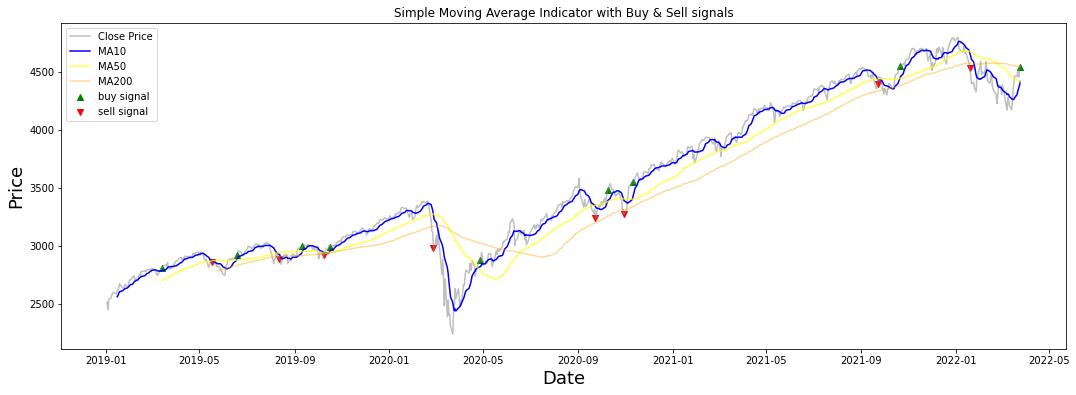

In [ ]:
plt.figure(figsize=(18,6))
plt.scatter(SP.index,SP['Buy_SMA'],color='green',label='buy signal',marker='^',alpha=1)
plt.scatter(SP.index,SP['Sell_SMA'],color='red', label='sell signal',marker='v',alpha=1)
plt.plot(SP['Close'],label='Close Price', color='gray',alpha=0.5)
plt.plot(SP['MA10'],label='MA10',color='blue',alpha=1)
plt.plot(SP['MA50'],label='MA50',color='yellow',alpha=0.7)
plt.plot(SP['MA100'],label='MA200',color='orange',alpha=0.4)

plt.title('Simple Moving Average Indicator with Buy & Sell signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.legend(loc='upper left')
plt.savefig("cb.png")
plt.show()
#files.download('cb.png')
#plt.axhline(y=0,color='red')

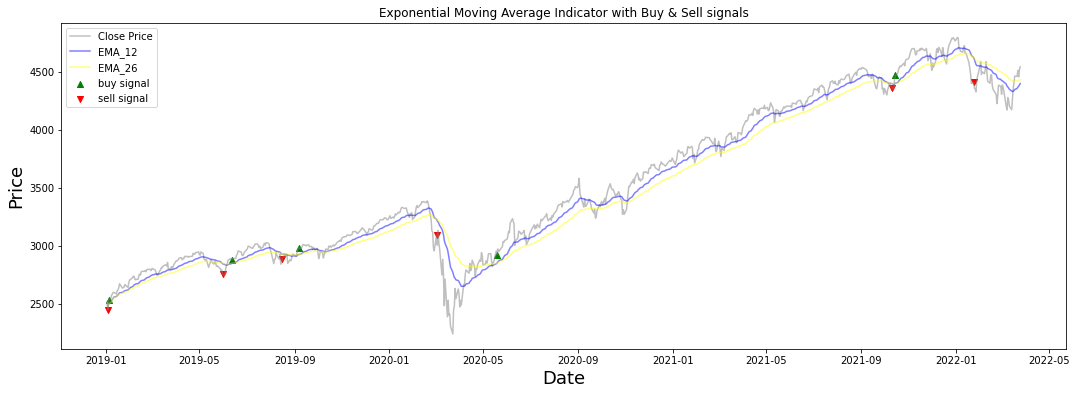

In [ ]:

plt.figure(figsize=(18,6))
plt.scatter(SP.index,SP['Buy_EMA'],label='buy signal',color='green',marker='^',alpha=1)
plt.scatter(SP.index,SP['Sell_EMA'], label='sell signal',color='red',marker='v',alpha=1)
plt.plot(SP['Close'],label='Close Price', color='gray',alpha=0.5)
plt.plot(SP['EMA_12'],label='EMA_12',color='blue',alpha=0.5)
plt.plot(SP['EMA_26'],label='EMA_26',color='yellow',alpha=0.5)
plt.title('Exponential Moving Average Indicator with Buy & Sell signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.legend(loc='upper left')
plt.savefig("cb.png")
plt.show()
#files.download('cb.png')
#plt.axhline(y=0,color='red')

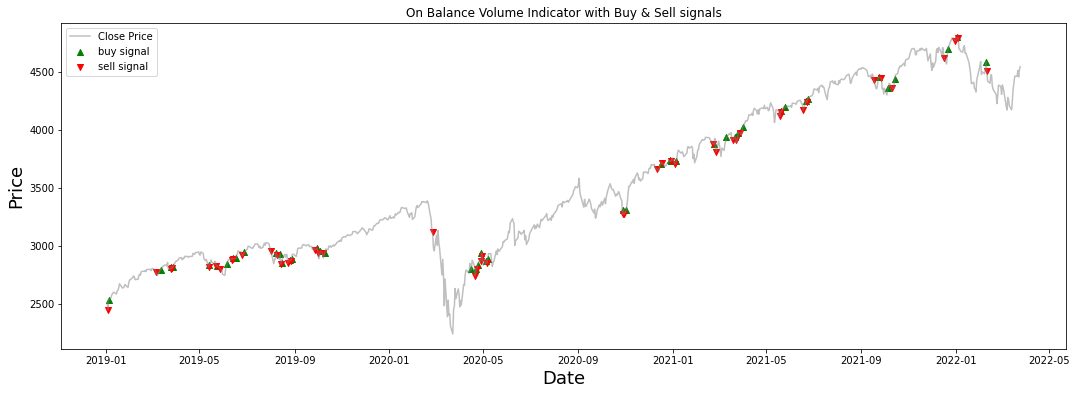

In [ ]:
plt.figure(figsize=(18,6))
plt.scatter(SP.index,SP['Buy_OBV'],label='buy signal',color='green',marker='^',alpha=1)
plt.scatter(SP.index,SP['Sell_OBV'], label='sell signal',color='red',marker='v',alpha=1)
plt.plot(SP['Close'],label='Close Price', color='gray',alpha=0.5)
plt.title('On Balance Volume Indicator with Buy & Sell signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.legend(loc='upper left')
plt.savefig("cb.png")
plt.show()
#files.download('cb.png')
#plt.axhline(y=0,color='red')

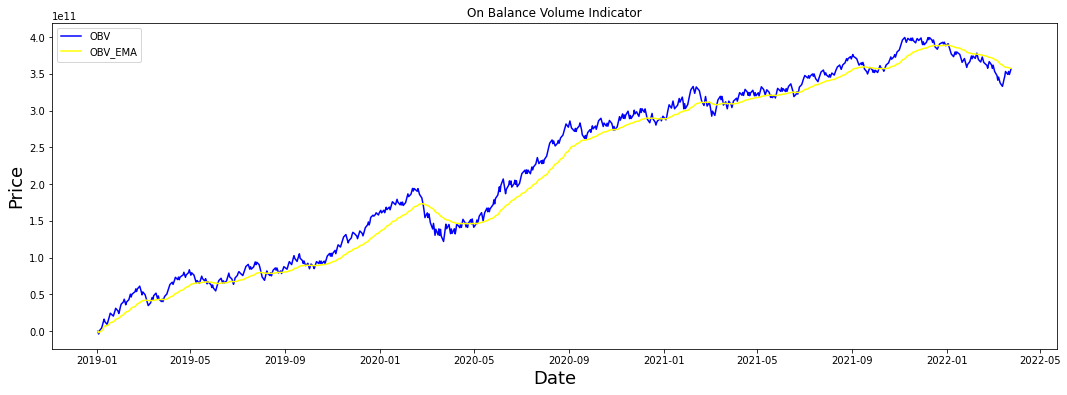

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(SP['OBV'],label='OBV', color='blue',alpha=1)
plt.plot(SP['OBV_EMA'],label='OBV_EMA', color='yellow',alpha=1)
plt.title('On Balance Volume Indicator')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.legend(loc='upper left')
plt.savefig("cb.png")
plt.show()

In [ ]:
SP.tail()

,Open,High,Low,Close,Volume,Profit,Wealth,MA10,MA50,MA100,...,%K,%D,buy-stoch,sell-stoch,plus_di,minus_di,ADX,Buy_ADX,Sell_ADx,OBV%
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-21,4462.399902,4481.750000,4424.299805,4461.180176,3961050000,50.429688,2001.579834,4304.180029,4428.025176,4550.015894,...,93.648934,96.978001,NaN,4461.180176,24.661820,22.869622,30.719144,NaN,NaN,97.36%
2022-03-22,4469.100098,4522.000000,4469.100098,4511.609863,3962880000,-55.369629,1946.210205,4338.270996,4424.716777,4549.615190,...,97.146585,96.684733,NaN,NaN,26.763035,21.822406,28.826890,NaN,NaN,98.54%
2022-03-23,4493.100098,4501.069824,4455.810059,4456.240234,4014360000,63.919922,2010.130127,4356.107031,4420.435781,4548.213394,...,81.940574,90.912031,NaN,NaN,25.162808,21.597628,27.481197,NaN,NaN,97.54%
2022-03-24,4469.979980,4520.580078,4465.169922,4520.160156,3573430000,22.899902,2033.030029,4382.171045,4416.577588,4547.361196,...,99.494729,92.860629,NaN,NaN,25.241674,20.288579,26.079455,NaN,NaN,98.61%
2022-03-25,4522.910156,4546.029785,4501.069824,4543.060059,3577520000,NaN,NaN,4416.046045,4412.911787,4546.655098,...,99.234921,93.556741,NaN,NaN,27.426400,20.238015,25.015127,NaN,NaN,99.63%


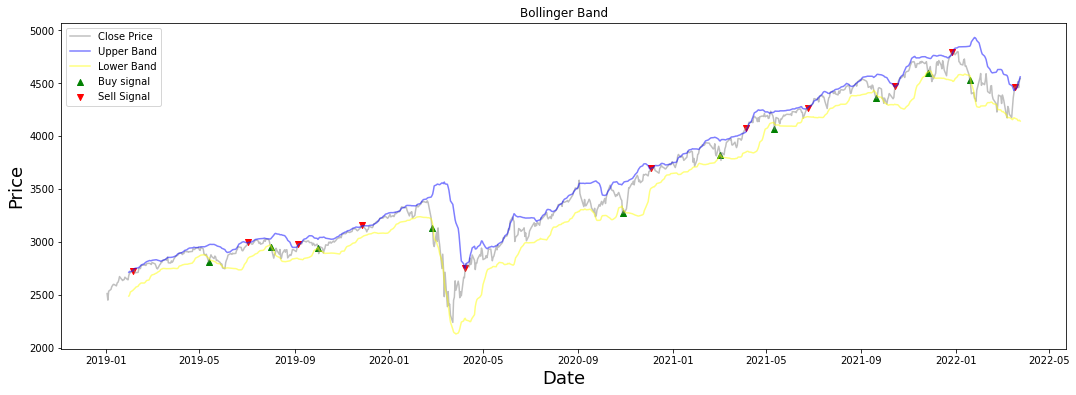

In [ ]:
plt.figure(figsize=(18,6))
plt.scatter(SP.index,SP['Buy_Bollinger'],label='Buy signal', color='green',marker='^',alpha=1)
plt.scatter(SP.index, SP['Sell_Bollinger'],label='Sell Signal',color='red',marker='v',alpha=1)
plt.plot(SP['Close'],label='Close Price',color='gray',alpha=0.5)
plt.plot(SP['BOLU'],label='Upper Band',color='blue',alpha=0.5)
plt.plot(SP['BOLD'],label='Lower Band',color='yellow',alpha=0.5)
plt.title('Bollinger Band')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.legend(loc='upper left')
plt.savefig('Bollinger.png')
plt.show()

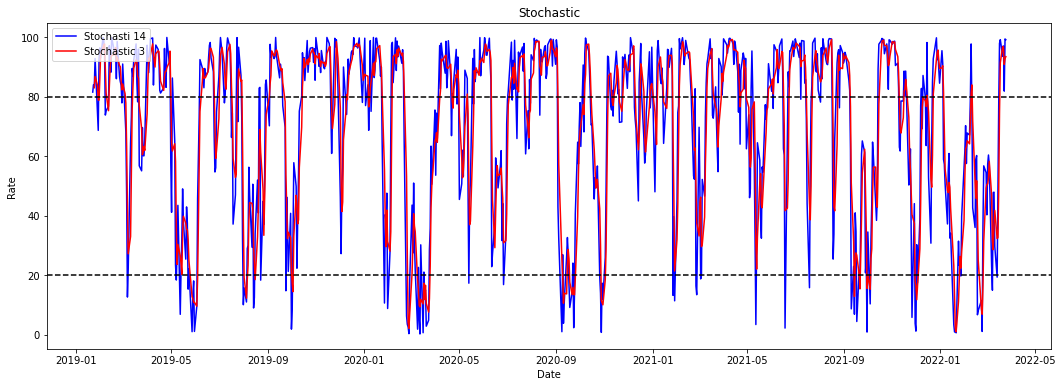

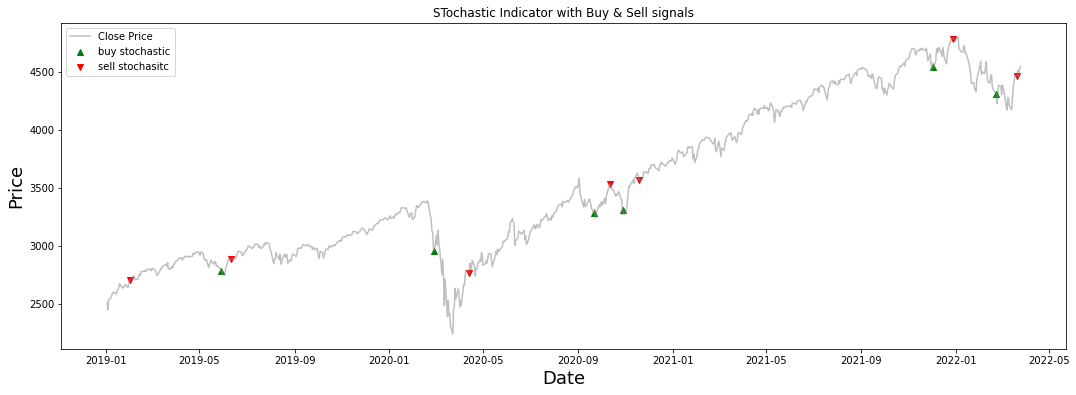

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(SP['%K'], color='blue', label='Stochasti 14')
plt.plot(SP['%D'], color='red', label='Stochastic 3')
plt.title('Stochastic')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.axhline(y = 20, color = 'black', linestyle = '--')
plt.axhline(y = 80, color = 'black', linestyle = '--')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(18,6))
plt.scatter(SP.index,SP['buy-stoch'],label='buy stochastic',color='green',marker='^',alpha=1)
plt.scatter(SP.index,SP['sell-stoch'], label='sell stochasitc',color='red',marker='v',alpha=1)
plt.plot(SP['Close'],label='Close Price', color='gray',alpha=0.5)
plt.title('STochastic Indicator with Buy & Sell signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.legend(loc='upper left')
plt.savefig("cb.png")
plt.show()

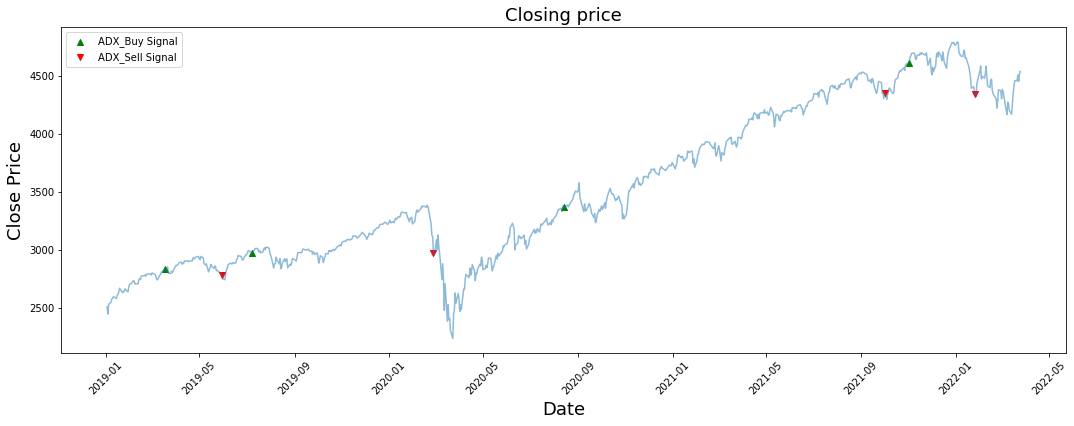

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(SP['Close'], alpha=0.5)
plt.scatter(SP.index, buy_price, label='ADX_Buy Signal', color='green', marker='^', alpha=1)
plt.scatter(SP.index, sell_price, label='ADX_Sell Signal', color='red', marker='v', alpha=1)
plt.title('Closing price', fontsize=18)
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(loc='upper left')
plt.show()

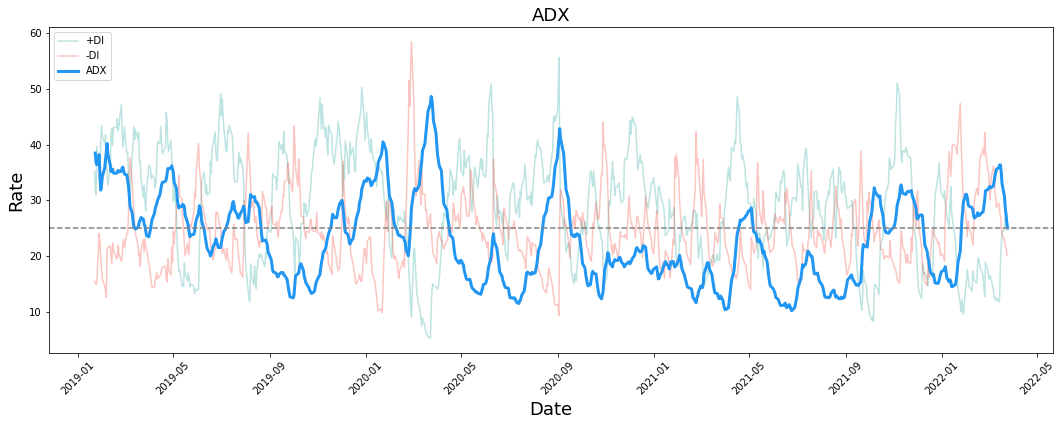

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(SP['plus_di'],color='#26a69a', label='+DI', alpha=0.3)
plt.plot(SP['minus_di'],color='#f44336', label='-DI', alpha=0.3)
plt.plot(SP['ADX'],color='#2196f3', label='ADX',linewidth=3, alpha=1)
plt.axhline(25, linestyle= '--', color='gray')
plt.title('ADX', fontsize=18)
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Rate', fontsize=18)
plt.legend(loc='upper left')
plt.show()

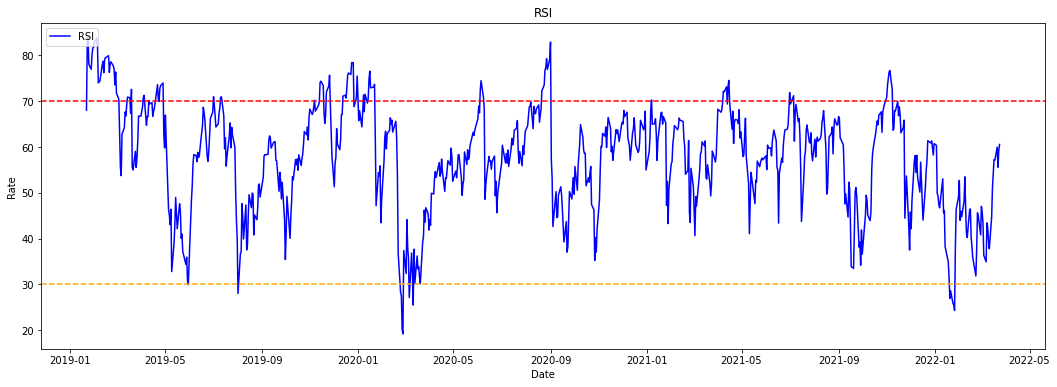

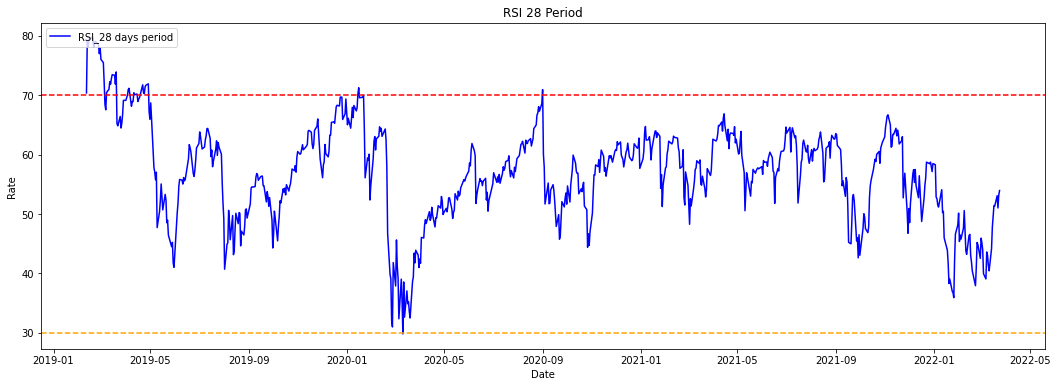

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(SP['RSI'], color='blue', label='RSI')
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.axhline(y = 30, color = 'orange', linestyle = '--')
plt.axhline(y = 70, color = 'red', linestyle = '--')
plt.legend(loc='upper left')
plt.show()



In [ ]:
SP['LongReturn'] = np.log(SP['Close']).shift(-1) - np.log(SP['Close'])

**Increase Price 10%**

In [ ]:
from scipy.stats import norm   
LR_mean=SP['LongReturn'].mean()            #calculate the mean
LR_sigma=SP['LongReturn'].std(ddof=1)     #calculate segma
prob_return=norm.cdf(0.1,LR_mean, LR_sigma)       #add the decrease or increase amount
print('The Probability of close price increase 10% for 1 Day is:', prob_return)   
# for 1 day

The Probability of close price increase 10% for 1 Day is: 0.9999999999986552


In [ ]:
LR_mean5= LR_mean*5
LR_sigma5= (5*0.5) * LR_sigma
increase10_5= norm.cdf(0.1, LR_mean5, LR_sigma5)   #here we add the percentage
print('The probabilty of icnrease price 10% for 5 Days is:', increase10_5)

The probabilty of icnrease price 10% for 5 Days is: 0.9966869268697425


In [ ]:
LR_mean10= LR_mean*10
LR_sigma10= (10*0.5) * LR_sigma
increase10_10= norm.cdf(0.1, LR_mean10, LR_sigma10)   #here we add the percentage
print('The probabilty of icnrease price 10% for 10 Days is:', increase10_10)

The probabilty of icnrease price 10% for 10 Days is: 0.9042561412639989


In [ ]:
LR_mean30= LR_mean*30
LR_sigma30= (30*0.5) * LR_sigma
increase10_30= norm.cdf(0.1, LR_mean30, LR_sigma30)   #here we add the percentage
print('The probabilty of icnrease price 10% for 30 Days is:', increase10_30)


The probabilty of icnrease price 10% for 30 Days is: 0.6431669264341408


**Increase Price 5%**

In [ ]:
LR_mean= LR_mean
LR_sigma=LR_sigma
increase5= norm.cdf(0.05, LR_mean, LR_sigma)   #here we add the percentage
print('The probabilty of icnrease price 5% for 1 Day is:', increase5)

The probabilty of icnrease price 5% for 1 Day is: 0.9997405998661316


In [ ]:
LR_mean5= LR_mean*5
LR_sigma5= (5*0.5) * LR_sigma
increase5_5= norm.cdf(0.05, LR_mean5, LR_sigma5)   #here we add the percentage
print('The probabilty of icnrease price 5% for 5 Days is:', increase5_5)

The probabilty of icnrease price 5% for 5 Days is: 0.9042561412639989


In [ ]:
LR_mean10= LR_mean*10
LR_sigma10= (10*0.5) * LR_sigma
increase5_10= norm.cdf(0.05, LR_mean10, LR_sigma10)   #here we add the percentage
print('The probabilty of icnrease price 5% for 10 Days is:', increase5_10)

The probabilty of icnrease price 5% for 10 Days is: 0.7263298143726633


In [ ]:
LR_mean30= LR_mean*30
LR_sigma30= (30*0.5) * LR_sigma
increase5_30= norm.cdf(0.05, LR_mean30, LR_sigma30)   #here we add the percentage
print('The probabilty of icnrease price 5% for 30 Days is:', increase5_30)


The probabilty of icnrease price 5% for 30 Days is: 0.5525566363606603


**Increase Peice 1%**

In [ ]:
LR_mean= LR_mean
LR_sigma=LR_sigma
increase1= norm.cdf(0.01, LR_mean, LR_sigma)   #here we add the percentage
print('The probabilty of icnrease price 1% for 1 Day is:', increase1)

The probabilty of icnrease price 1% for 1 Day is: 0.7431525937344665


In [ ]:
LR_mean5= LR_mean*5
LR_sigma5= (5*0.5) * LR_sigma
increase1_5= norm.cdf(0.01, LR_mean5, LR_sigma5)   #here we add the percentage
print('The probabilty of icnrease price 1% for 5 Days is:', increase1_5)

The probabilty of icnrease price 1% for 5 Days is: 0.5710649297607866


In [ ]:
LR_mean10= LR_mean*10
LR_sigma10= (10*0.5) * LR_sigma
increase1_10= norm.cdf(0.01, LR_mean10, LR_sigma10)   #here we add the percentage
print('The probabilty of icnrease price 1% for 10 Days is:', increase1_10)

The probabilty of icnrease price 1% for 10 Days is: 0.5152350773131545


In [ ]:
LR_mean30= LR_mean*30
LR_sigma30= (30*0.5) * LR_sigma
increase1_30= norm.cdf(0.01, LR_mean30, LR_sigma30)   #here we add the percentage
print('The probabilty of icnrease price 1% for 30 Days is:', increase1_30)

The probabilty of icnrease price 1% for 30 Days is: 0.4777794758020945


**decrease Price 10%**

In [ ]:
LR_mean_1= LR_mean
LR_sigma_1= LR_sigma
decrease10= norm.cdf(-0.1, LR_mean_1, LR_sigma_1)   #here we add the percentage
print('The probabilty of decrease price 10% for 1 Days is:', decrease10)

The probabilty of decrease price 10% for 1 Days is: 6.432634366476295e-13


In [ ]:
LR_mean_5= LR_mean*5
LR_sigma_5= (5*0.5) * LR_sigma
decrease10_5= norm.cdf(-0.1, LR_mean_5, LR_sigma_5)   #here we add the percentage
print('The probabilty of decrease price 10% for 5 Days is:', decrease10_5)

The probabilty of decrease price 10% for 5 Days is: 0.0017476216429626122


In [ ]:
LR_mean_10= LR_mean*10
LR_sigma_10= (10*0.5) * LR_sigma
decrease10_10= norm.cdf(-0.1, LR_mean_10, LR_sigma_10)   #here we add the percentage
print('The probabilty of decrease price 10% for 10 Days is:', decrease10_10)

The probabilty of decrease price 10% for 10 Days is: 0.0653215259779472


In [ ]:
LR_mean_30= LR_mean*30
LR_sigma_30= (30*0.5) * LR_sigma
decrease10_30= norm.cdf(-0.1, LR_mean_30, LR_sigma_30)   #here we add the percentage
print('The probabilty of decrease price 10% for 30 Days is:', decrease10_30)

The probabilty of decrease price 10% for 30 Days is: 0.28355359865077046


**Decrease Price 5%**

In [ ]:
LR_mean= LR_mean
LR_sigma=LR_sigma
decrease5= norm.cdf(-0.05, LR_mean, LR_sigma)   #here we add the percentage
print('The probabilty of decrease price 5% for 1 Day is:', decrease5)

The probabilty of decrease price 5% for 1 Day is: 0.0001760889402161961


In [ ]:
LR_mean5= LR_mean*5
LR_sigma5= (5*0.5) * LR_sigma
decrease5_5= norm.cdf(-0.05, LR_mean5, LR_sigma5)   #here we add the percentage
print('The probabilty of decrease price 5% for 5 Days is:', decrease5_5)

The probabilty of decrease price 5% for 5 Days is: 0.0653215259779472


In [ ]:
LR_mean10= LR_mean*10
LR_sigma10= (10*0.5) * LR_sigma
decrease5_10= norm.cdf(-0.05, LR_mean10, LR_sigma10)   #here we add the percentage
print('The probabilty of decrease price 5% for 10 Days is:', decrease5_10)

The probabilty of decrease price 5% for 10 Days is: 0.20979564404840056


In [ ]:
LR_mean30= LR_mean*30
LR_sigma30= (30*0.5) * LR_sigma
decrease5_30= norm.cdf(-0.05, LR_mean30, LR_sigma30)   #here we add the percentage
print('The probabilty of decrease price 5% for 30 Days is:', decrease5_30)


The probabilty of decrease price 5% for 30 Days is: 0.36786865434402727


**Decrease Price 1%**

In [ ]:
LR_mean= LR_mean
LR_sigma=LR_sigma
decrease1= norm.cdf(-0.01, LR_mean, LR_sigma)   #here we add the percentage
print('The probabilty of decrease price 1% for 1 Day is:', decrease1)

The probabilty of decrease price 1% for 1 Day is: 0.2248889165573148


In [ ]:
LR_mean5= LR_mean*5
LR_sigma5= (5*0.5) * LR_sigma
decrease1_5= norm.cdf(-0.01, LR_mean5, LR_sigma5)   #here we add the percentage
print('The probabilty of decrease price 1% for 5 Days is:', decrease1_5)

The probabilty of decrease price 1% for 5 Days is: 0.3503164416340292


In [ ]:
LR_mean10= LR_mean*10
LR_sigma10= (10*0.5) * LR_sigma
decrease1_10= norm.cdf(-0.01, LR_mean10, LR_sigma10)   #here we add the percentage
print('The probabilty of decrease price 1% for 10 Days is:', decrease1_10)

The probabilty of decrease price 1% for 10 Days is: 0.4037787570507927


In [ ]:
LR_mean30= LR_mean*30
LR_sigma30= (30*0.5) * LR_sigma
decrease1_30= norm.cdf(-0.01, LR_mean30, LR_sigma30)   #here we add the percentage
print('The probabilty of decrease price 1% for 30 Days is:', decrease1_30)

The probabilty of decrease price 1% for 30 Days is: 0.44051926962023474
